In [61]:
import numpy as np
import netCDF4 as nc
import os
import scipy.io as sio
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import sys
from matplotlib import colors
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions
%matplotlib inline
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [63]:
k_eyeballed = 4.62e-07

In [64]:
# changing frequency guesses

k_first= np.round(k_eyeballed*0.05,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

print(f_guess*1,numb_freq,k_first,increment) # wave
print(f_guess*2) # none
print(f_guess*1.5) # wave
print(f_guess*1.8) # none
print(f_guess*1.7) # none - cancelled
print(f_guess*1.6) # none
print(f_guess*1.52) # wave

3.3e-06 200 2.31e-08 1.73e-08
6.6e-06
4.95e-06
5.940000000000001e-06
5.6100000000000005e-06
5.28e-06
5.016e-06


In [65]:
# reducing the wavenumbers to find higher frequencies (i.e. lower modes)

k_first= np.round(k_eyeballed*0.005,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

print(f_guess*1.6,numb_freq,k_first,increment) # first without wave


5.28e-06 200 2.3e-09 1.7e-09


# Sets of $\omega$-$\kappa$

|label|frequency first guess|number of frequencies|first wavenumber|increments|filename|
|-----|--------|----|---------|---------|---------------|
|A|3.3e-06 |200 |2.31e-08 |1.73e-08 |dispc_33e06.dat|
|B|4.95e-06 |200 |2.31e-08 |1.73e-08 |dispc_495e06.dat|
|C|5.016e-06 |200 |2.31e-08 |1.73e-08 |dispc_502e06.dat|
|D|5.28e-06 |50 |2.3e-09 |1.7e-09|dispc_528e06.dat|
|E|0.008 |50 |1.15e-09 |8.62e-10|dispc_08e2.dat|

# Dispersion curves

In [66]:
def axis_properties(ax, xmin, xmax, ymin, ymax):
    ax.legend(fontsize=20, loc=2)
    ax.axhline(0,lw=2,c='k',zorder=1)
    ax.set_xlabel('wavenumber $\kappa$ (rad/cm)', fontsize=16)
    ax.set_ylabel('frequency $\omega$ (rad/sec)', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return

run this  8.881e-07 5.7089435e-05


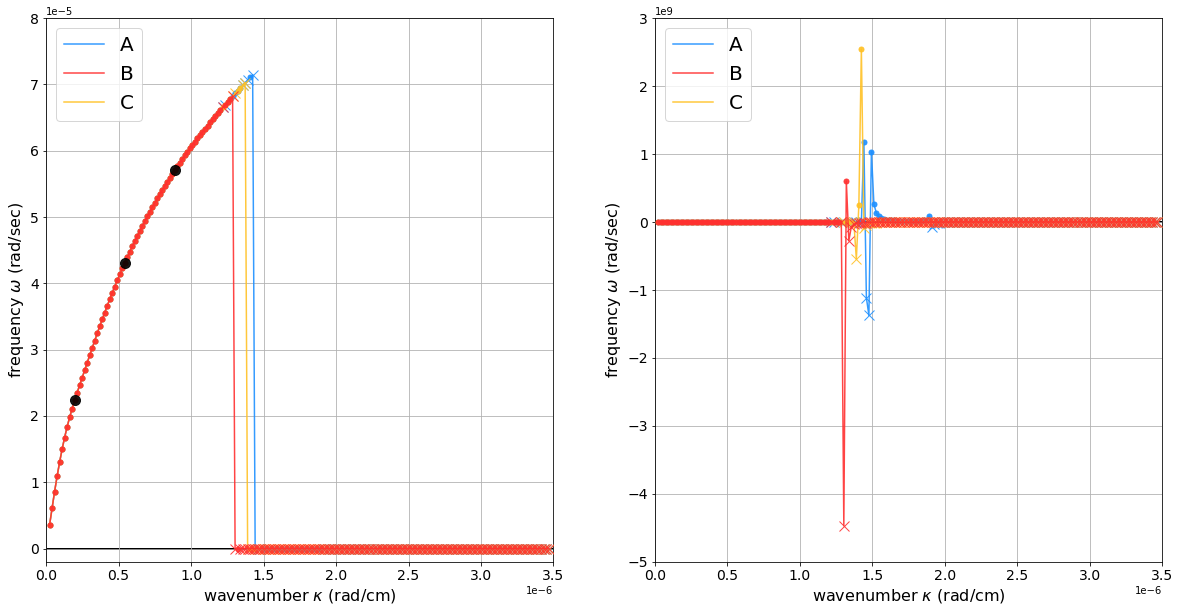

In [91]:
fnames = ['dispc_33e06.dat', 'dispc_495e06.dat', 'dispc_502e06.dat']
colours = ['#1E90FF', '#FF3030', '#FFC125']
zorders = [2, 4, 3]
labels = ['A', 'B', 'C']

fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 10))

for fname, c, zo, lab, n in zip(fnames, colours, zorders, labels, np.arange(len(fnames))):
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    for i in range(len(wavenumber)):
        if other_frequency[i]<0:
            mk='x'
        else:
            mk='.'
        ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    ax.grid(); axi.grid()
    
    if lab=='B':
        ind=10; ax.plot(wavenumber[ind], frequency[ind], marker='.', ms=20, c='k', alpha=0.9, zorder=zo)
        ind=30; ax.plot(wavenumber[ind], frequency[ind], marker='.', ms=20, c='k', alpha=0.9, zorder=zo)
        print('run this ', wavenumber[ind], frequency[ind])
    
axis_properties(ax, 0, 3.5e-06, -0.2e-5, 8e-5)
axis_properties(axi, 0, 3.5e-06, -5e09, 3e09)

run this  4.31e-08 0.00026284126


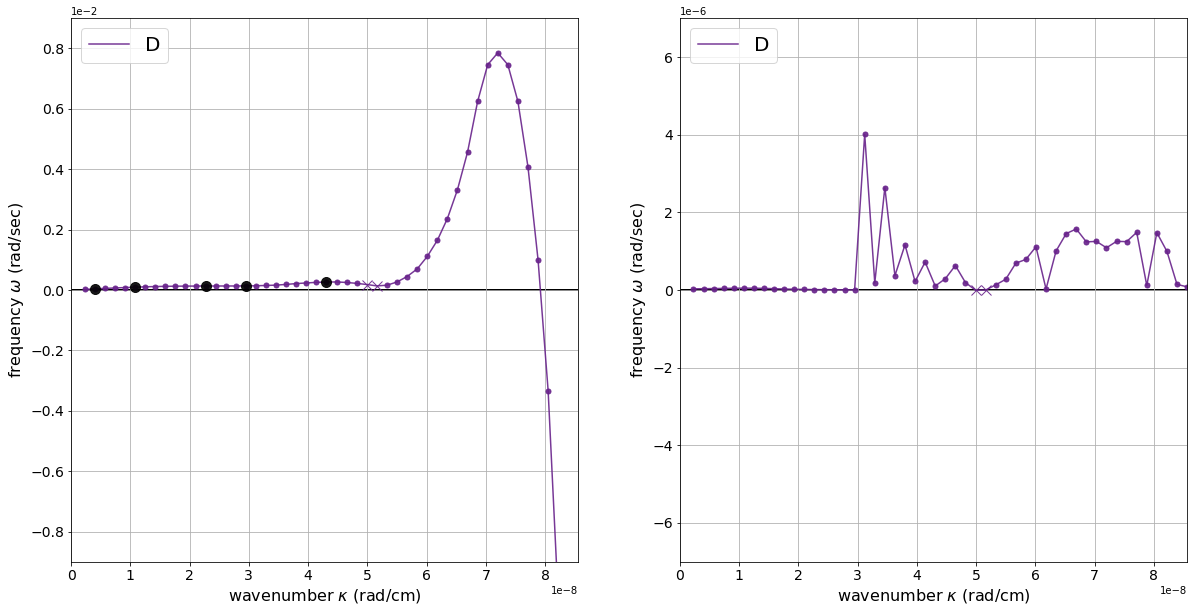

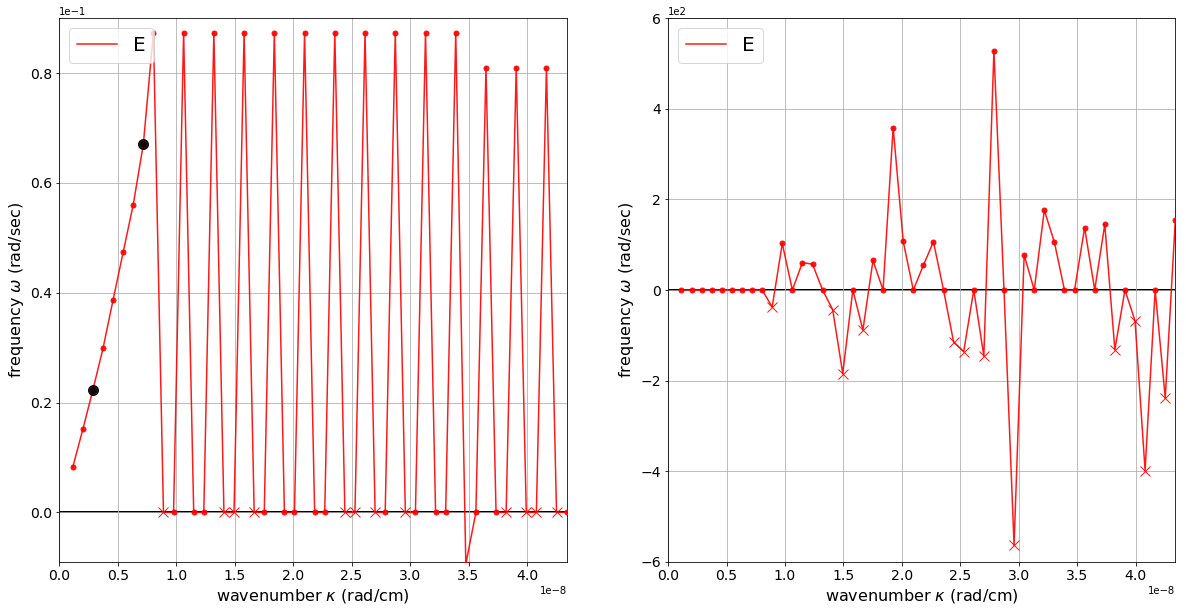

In [68]:
fnames=['dispc_528e06.dat', 'dispc_08e2.dat']
zorders=[2,3]
labels=['D','E']
colours=['#68228B','r']
ymaxs = [9e-3,9e-2]
ymaxsi = [7e-6,600]

for fname, c, zo, lab, ymax, ymaxi, n in zip(fnames, colours, zorders, labels, ymaxs, ymaxsi, np.arange(len(fnames))):
    fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 10))
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    for i in range(len(wavenumber)):
        if other_frequency[i]<0:
            mk='x'
        else:
            mk='.'
        ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axis_properties(ax, 0, wavenumber.max(), -0.9e-2, ymax)
    axis_properties(axi, 0, wavenumber.max(), -ymaxi, ymaxi)
    ax.grid(); axi.grid()
    
    if fname=='dispc_528e06.dat':
        ind=1; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ind=5; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ind=12; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ind=16; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ind=24; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        print('run this ', wavenumber[ind], frequency[ind])
    
    if fname=='dispc_08e2.dat':
        ind=2; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ind=7; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        

# Snapshots of $\omega$-$\kappa$

In [69]:
def plot_wave_structure(filename, title):
    file = sio.loadmat('/ocean/imachuca/CTW_Brink/output/'+filename)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
    k, f = file['wavenumber'][0][0], file['frequency'][0][0]
    p, u, v, w, r = file['p_profile'], file['u_profile'], file['v_profile'], file['w_profile'], file['r_profile']
    R = file['ratio_for_wave'][0][0]

    ttls = ['pressure', 'u-velocity', 'v-velocity', 'w-velocity', 'rho']
    fig, axes = plt.subplots(3,2,figsize=(20,14), sharex=True, sharey=True)
    for ax, plot_array, ttl in zip(axes.flatten(), [p, u, v, w, r], ttls):
        if ttl=='pressure' or ttl=='rho':
            cmap=cmo.cm.balance
            norm = upwelling_functions.MidpointNormalize(midpoint=0)
        else:
            cmap=cmo.cm.balance
            norm = upwelling_functions.MidpointNormalize(midpoint=0)
            
        c = ax.contourf(xpl, z, plot_array, cmap=cmap, norm=norm, zorder=1)
        ax.contour(xpl, z, plot_array, 8, linewidths=0.8, colors='w', zorder=2)
        ax.contour(xpl, z, plot_array, levels=[0], linewidths=2, colors='k', zorder=3)
        ax.fill_between(xxx, zzz.min(), zzz, facecolor='#8b7765', zorder=4)
        fig.colorbar(c, ax=ax)
        ax.set_title(ttl, fontsize=20)
        
    axes[-1, -1].annotate('wavenumber \n'+str(k), (100, -300), fontsize=20)
    axes[-1, -1].annotate('frequency \n'+str(f), (100, -600), fontsize=20)
    axes[-1, -1].annotate('ratio \n'+str(R), (100, -900), fontsize=20)
    axes[-1, -1].axis('off')
        
    fig.tight_layout()
    plt.subplots_adjust(top=0.93, wspace=0.01, hspace=0.1)
    fig.suptitle('Wave structure - '+title, fontsize=24)
    return fig

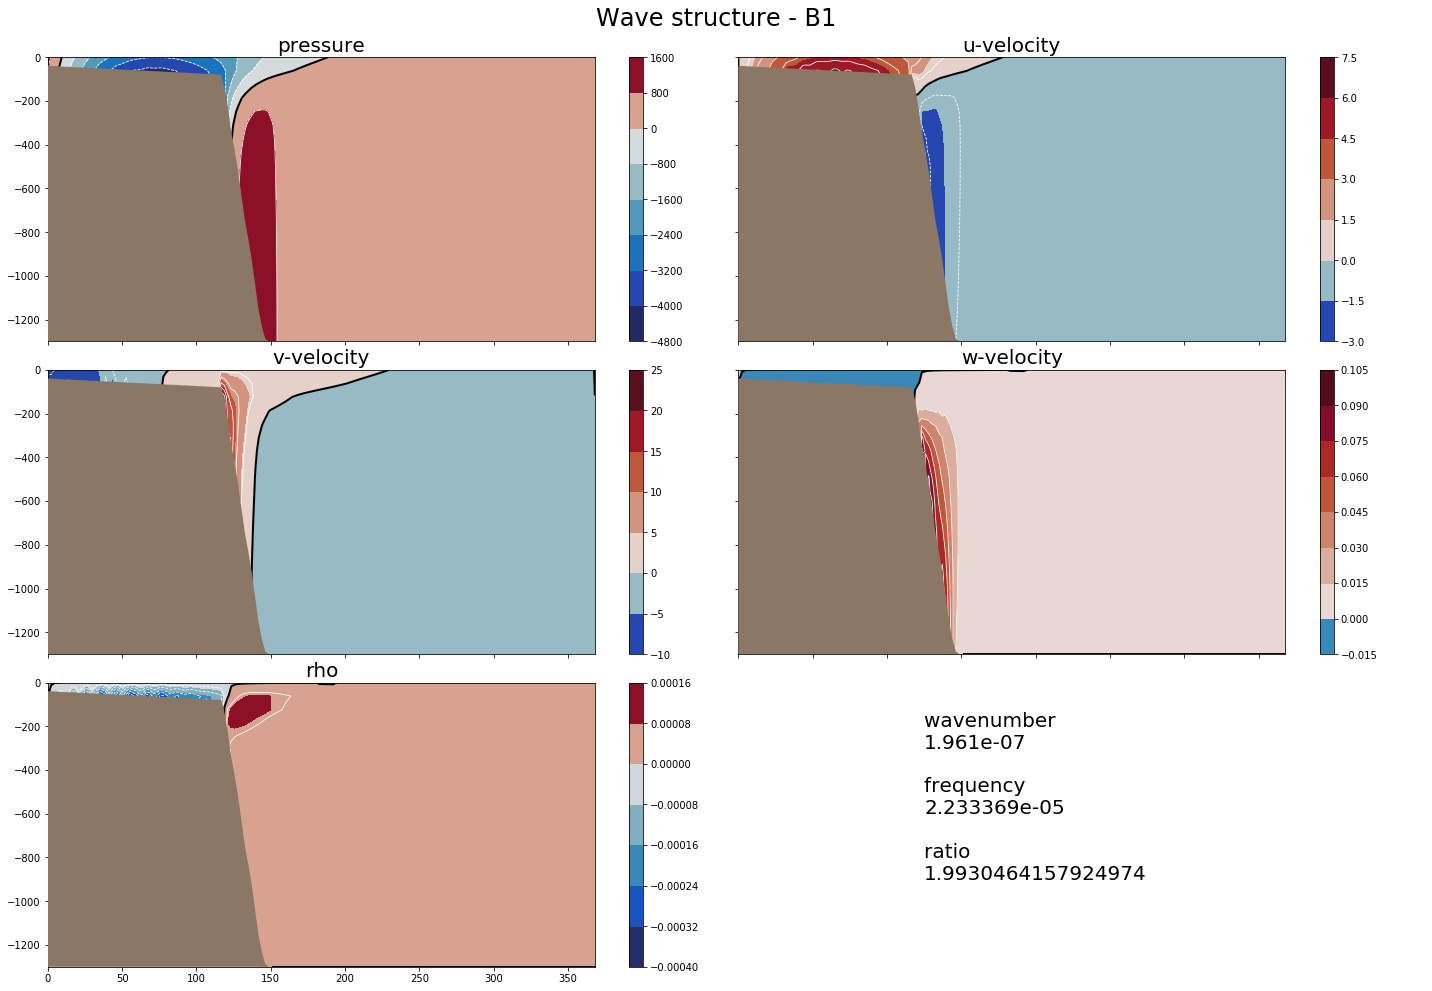

In [86]:
fig = plot_wave_structure('figures_B1.mat', 'B1')

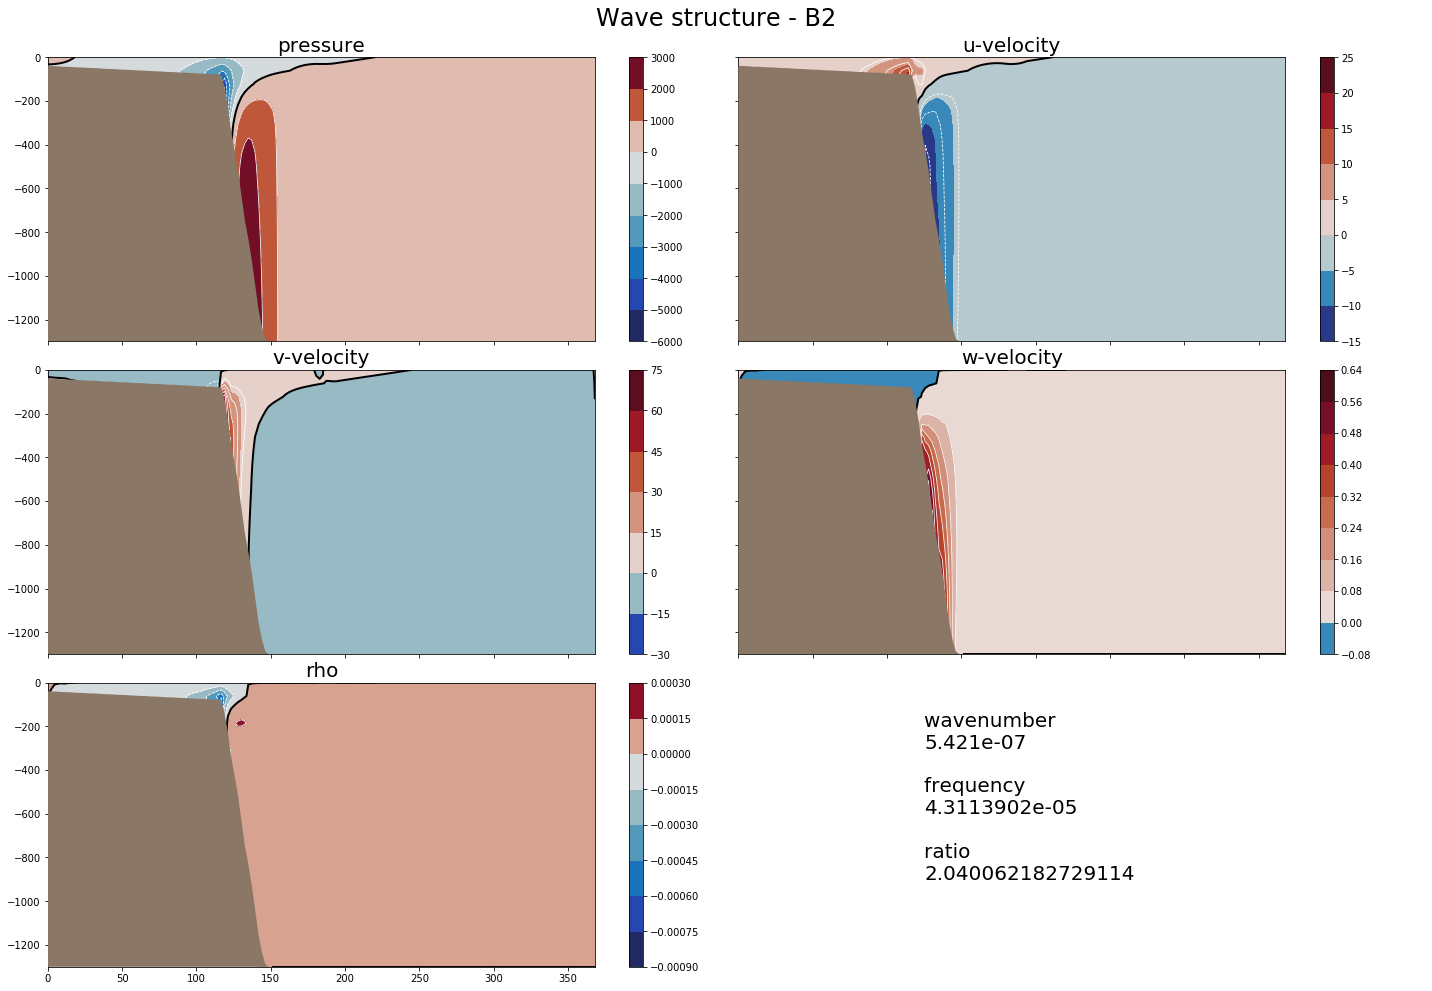

In [89]:
fig = plot_wave_structure('figures_B2.mat', 'B2')

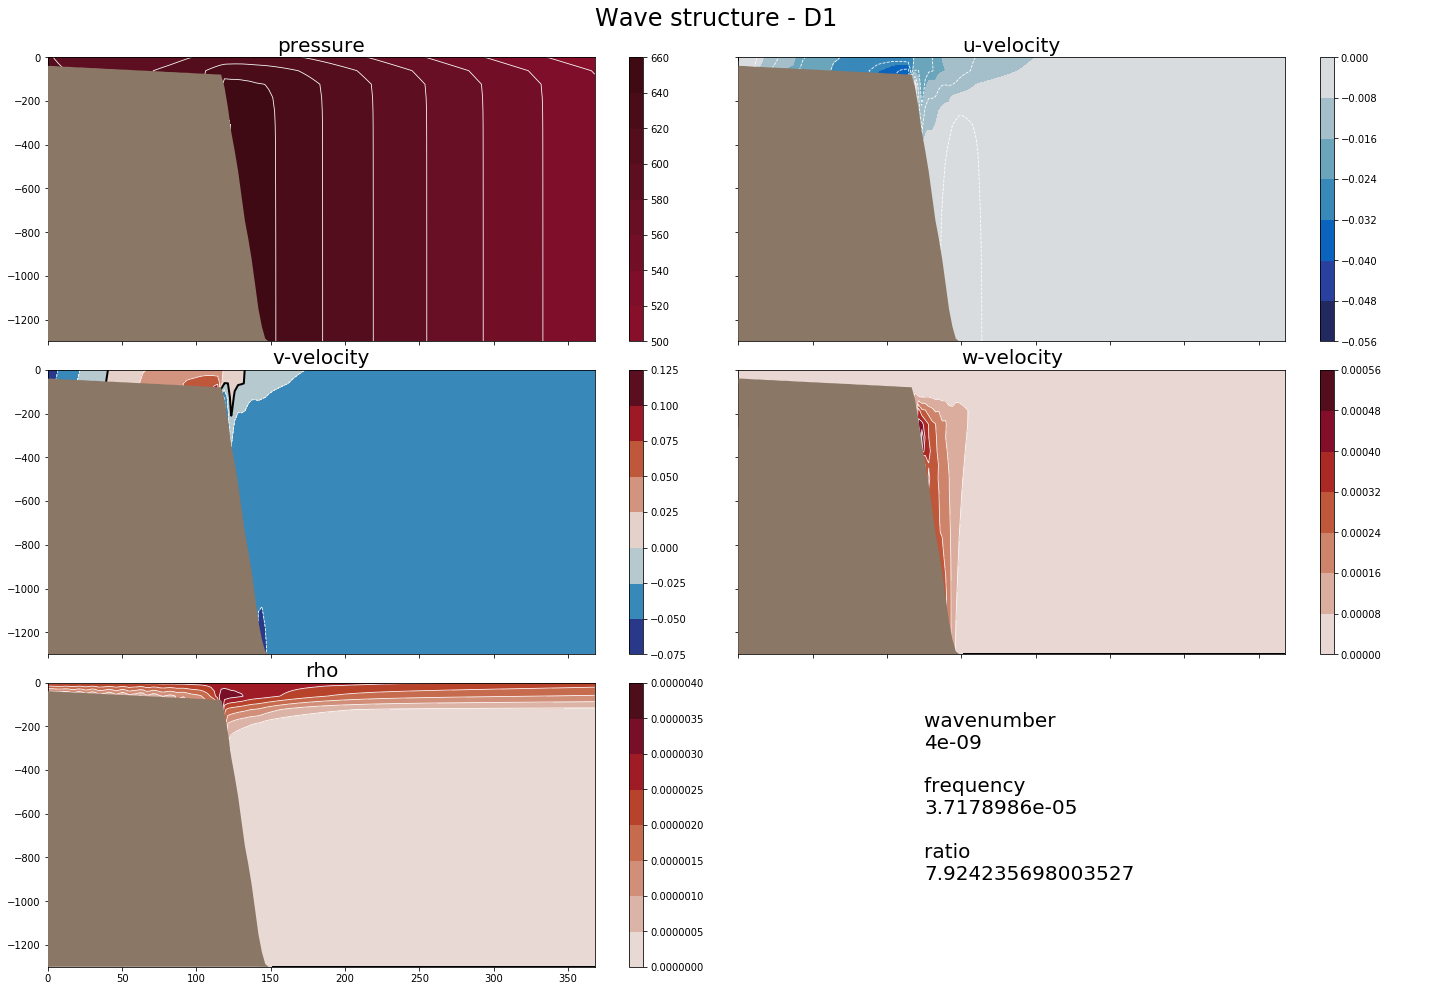

In [70]:
fig = plot_wave_structure('figures_D1.mat', 'D1')

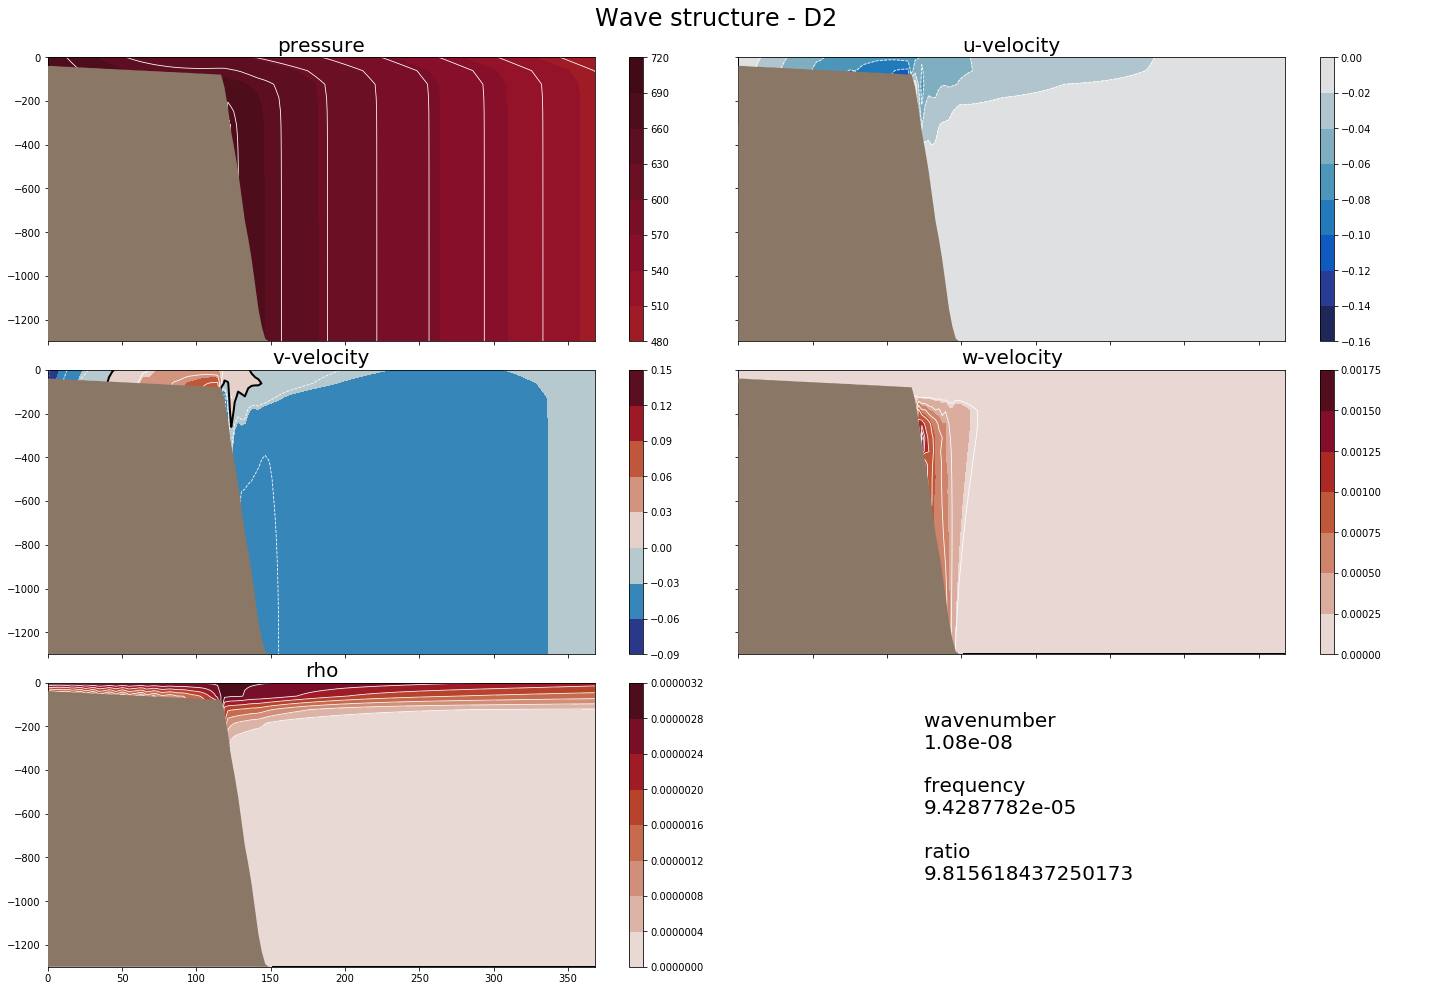

In [71]:
fig = plot_wave_structure('figures_D2.mat', 'D2')

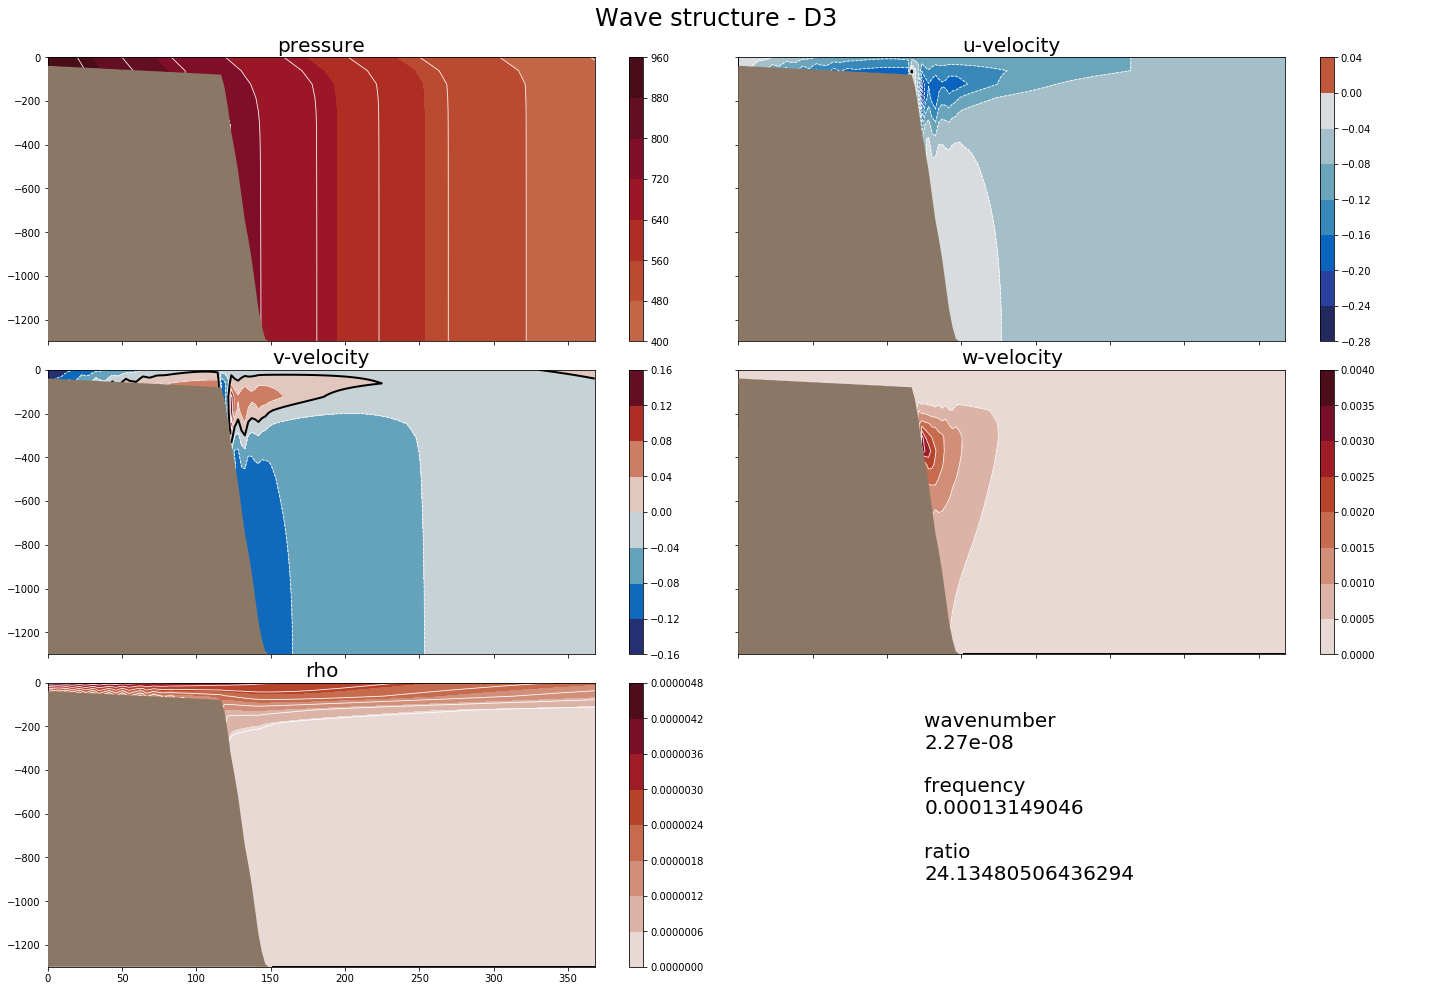

In [72]:
fig = plot_wave_structure('figures_D3.mat', 'D3')

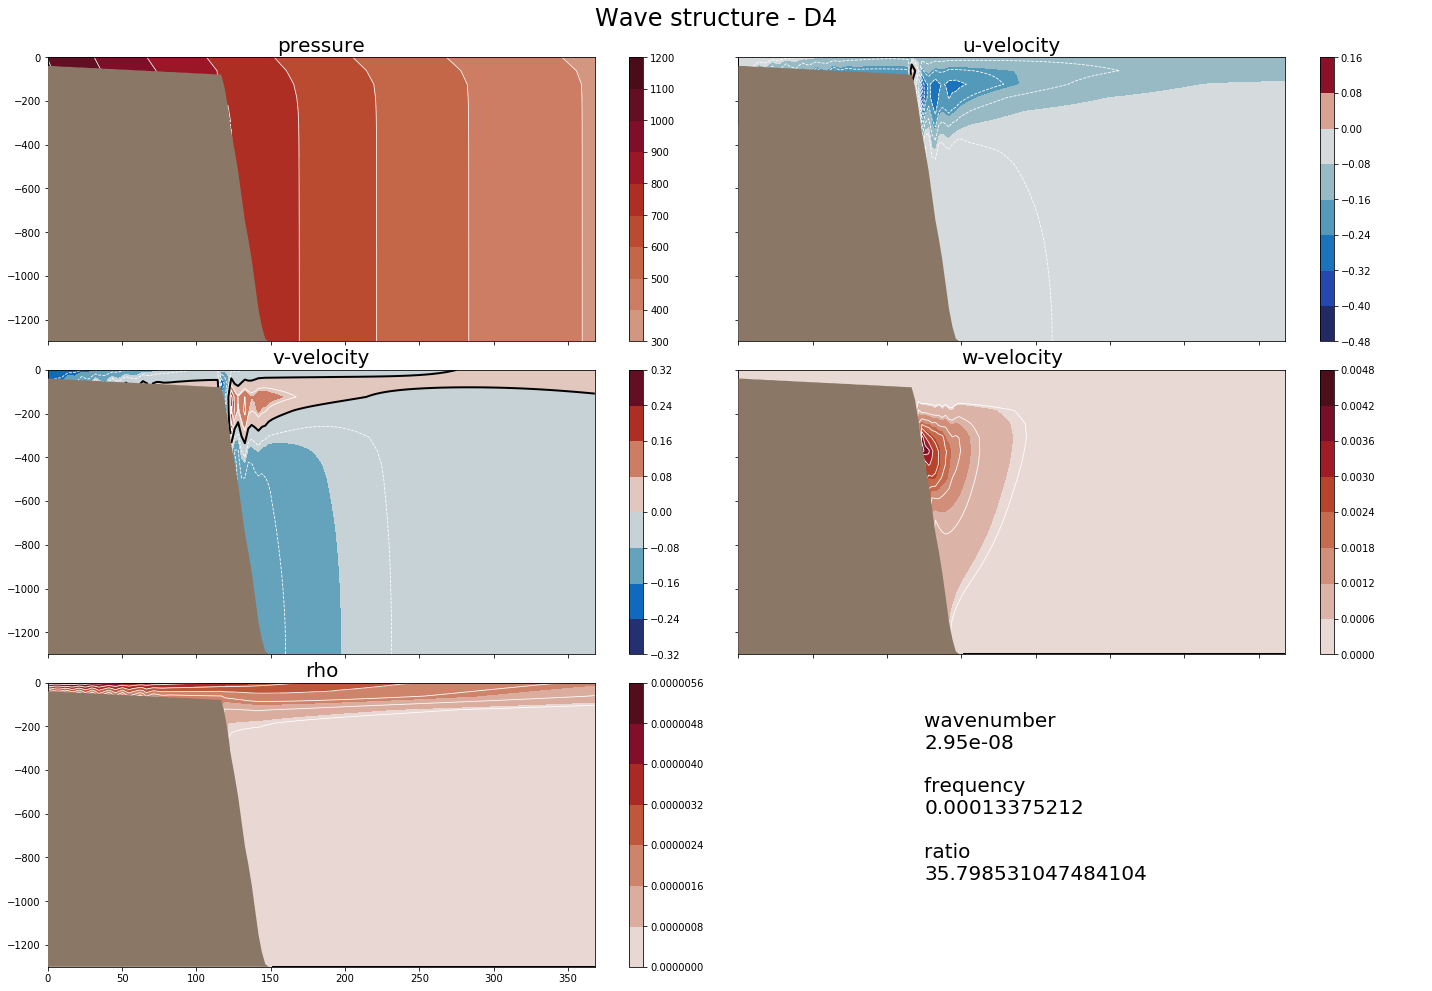

In [73]:
fig = plot_wave_structure('figures_D4.mat', 'D4')

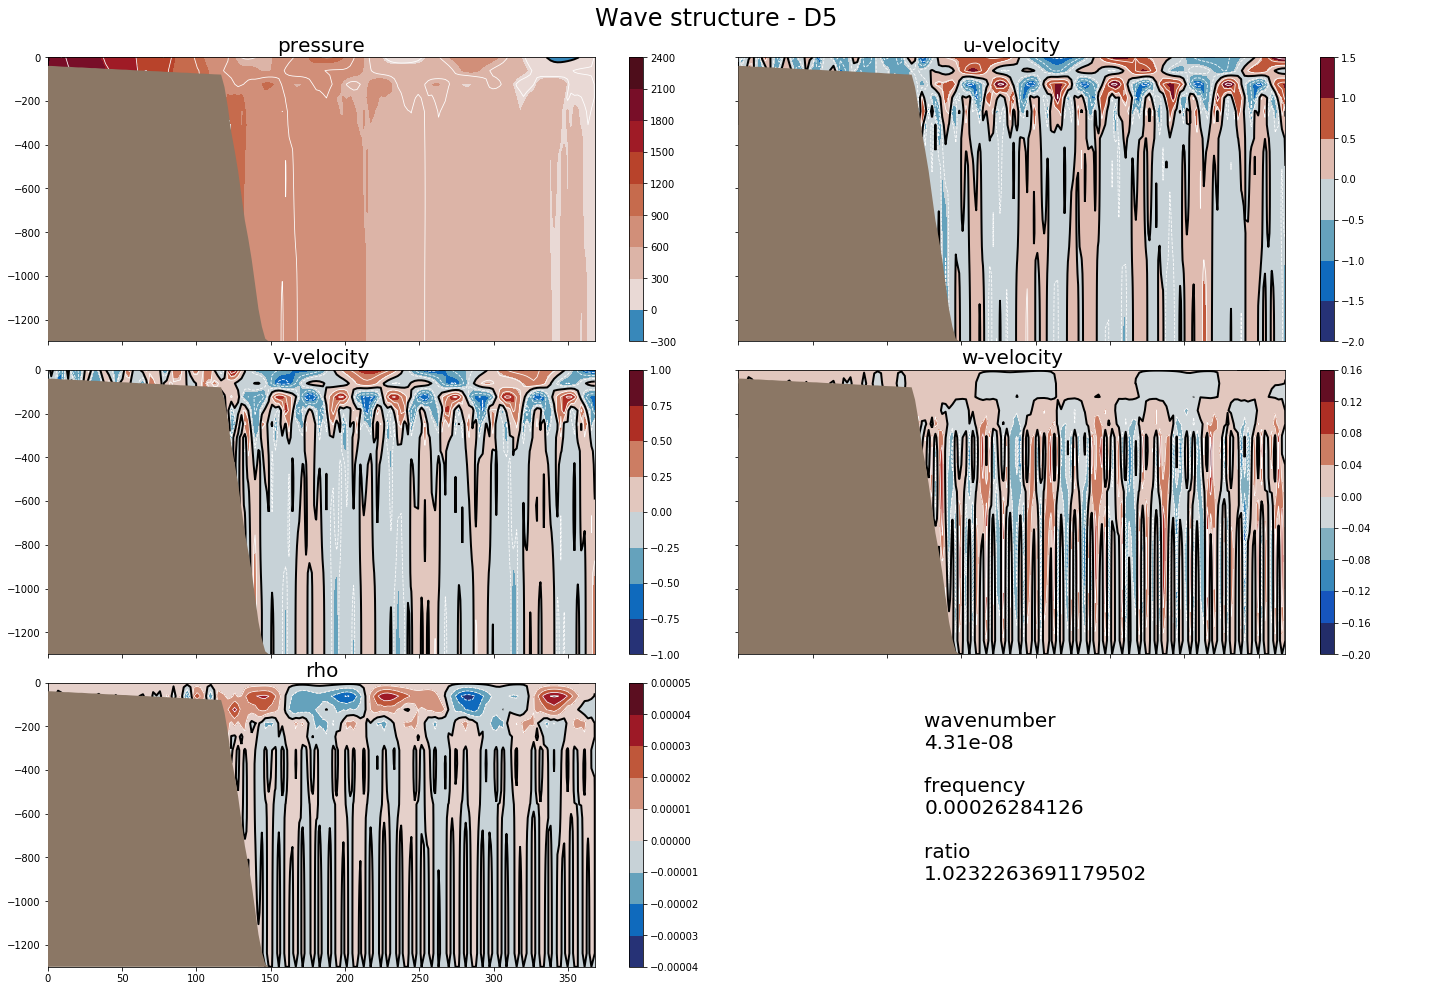

In [74]:
fig = plot_wave_structure('figures_D5.mat', 'D5')

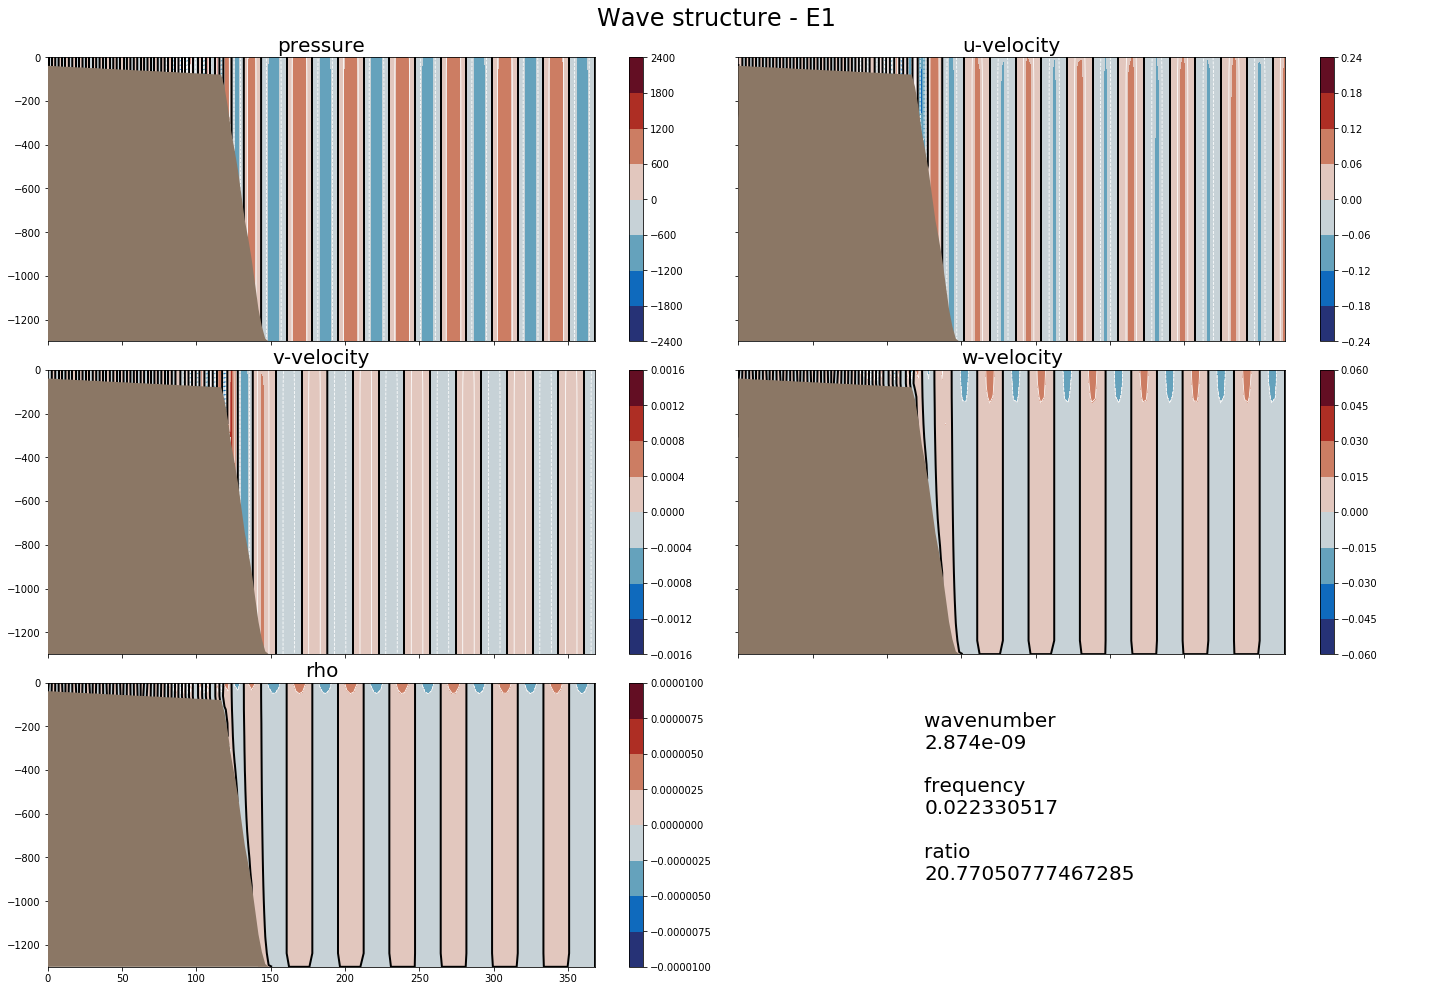

In [75]:
fig = plot_wave_structure('figures_E1.mat', 'E1')

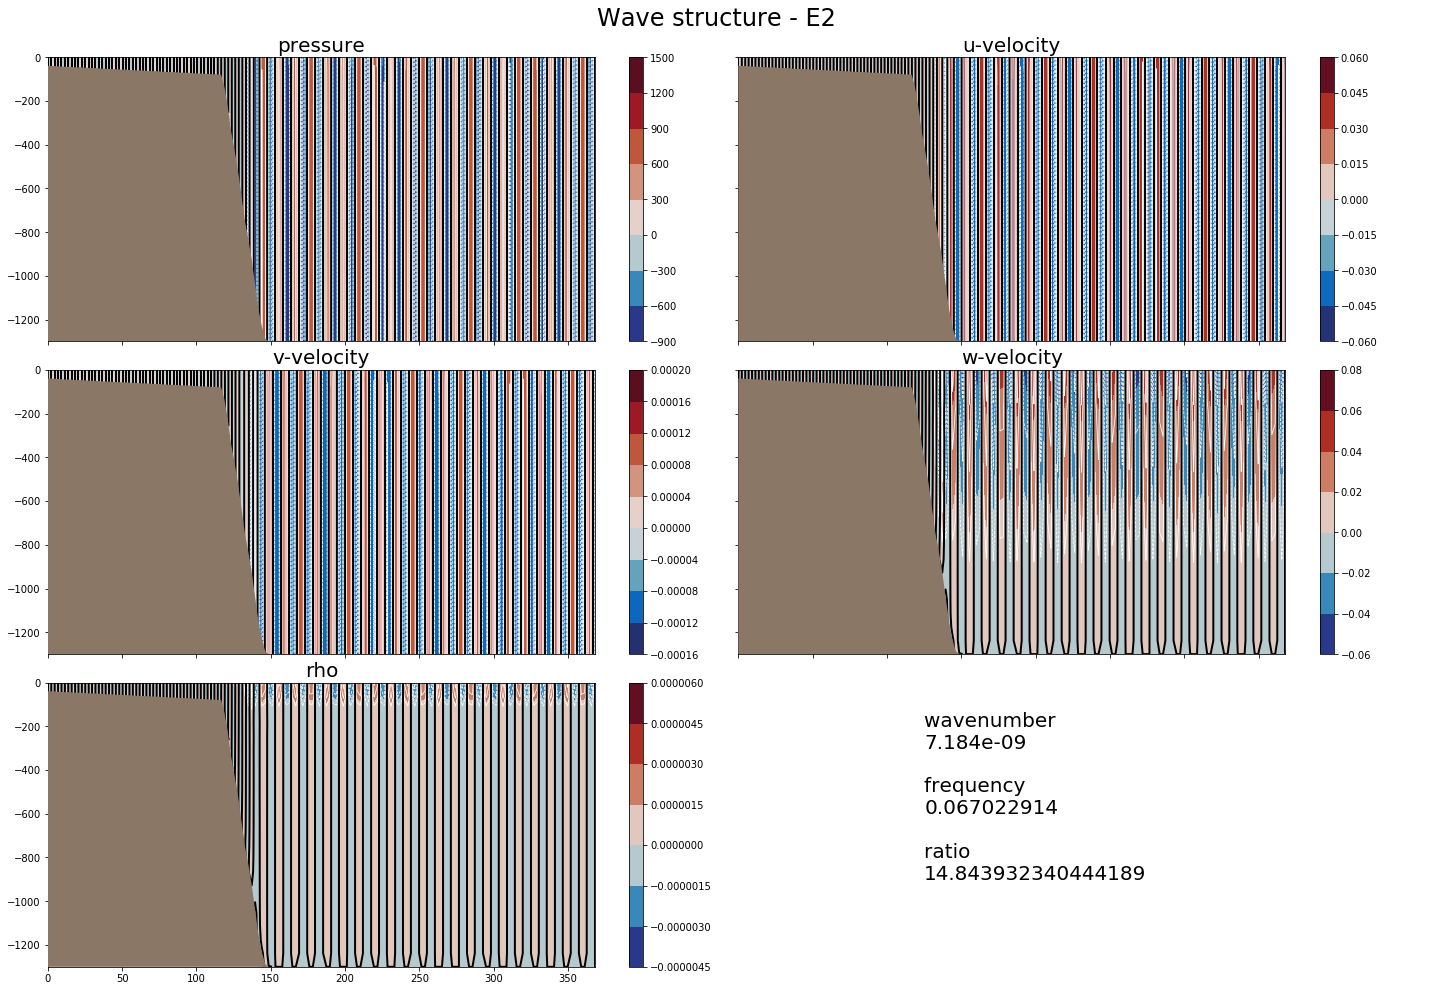

In [76]:
fig = plot_wave_structure('figures_E2.mat', 'E2')